<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluna: [Maria Luiza Cordeiro](https://www.linkedin.com/in/malu-analise-de-dados/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A ideia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

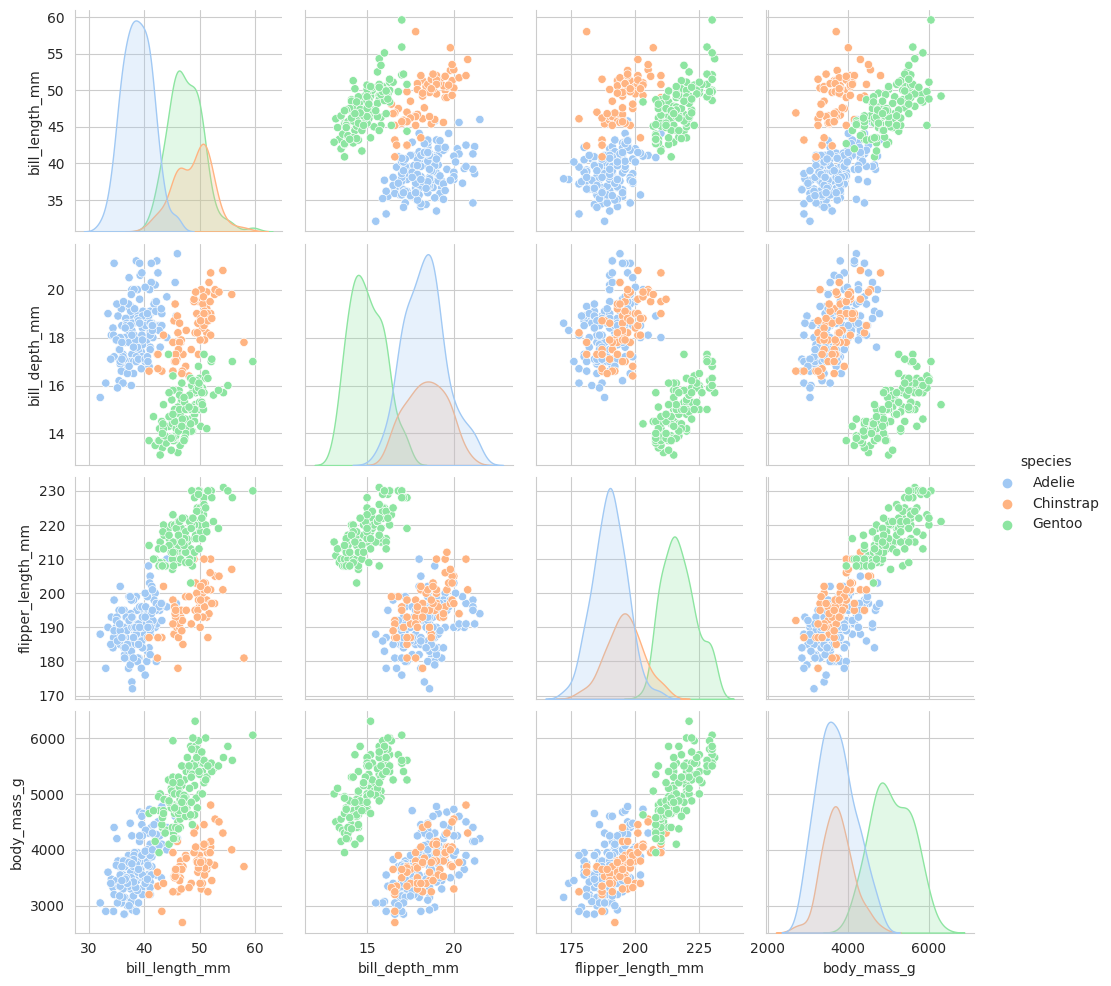

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:**

As espécies Adelie e Chinstrap apresentam comportamento semelhante na maioria dos gráficos, porém há uma maior expressividade nos indivíduos da espécie Adelie do que os da espécie Chistrap.

 - Sexo por espécie:

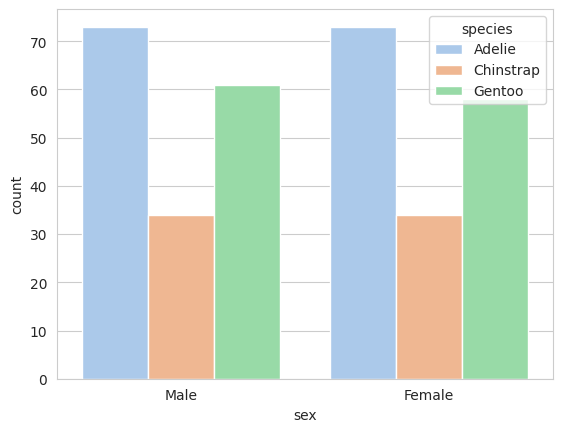

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:**

Tanto para o masculino quanto para o feminino, as espécies se comportam de forma semelhante e possuem, praticamente, a mesma quantidade.

 - Ilha por espécie:

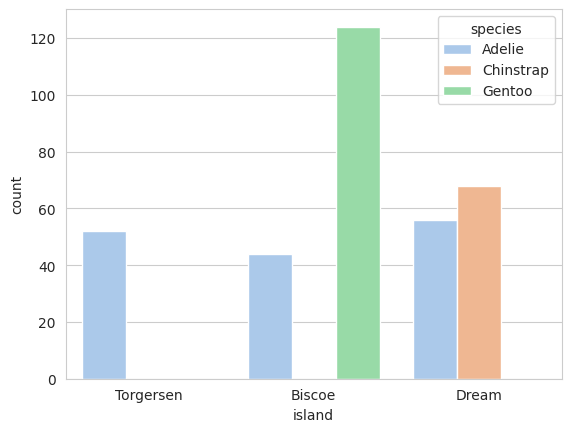

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:**

- Em nenhuma ilha há a presença dos 3 penguins.
- A espécie Adelie está presente nas 3 ilhas.
- A espécie Gentoo só está na ilha Biscoe e a espécie Chinstrap só está na ilha Dream.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [7]:
# resposta da questão 2.1

penguins_clean_df = penguim.dropna(subset=['sex'])
penguins_clean_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [8]:
print(penguins_clean_df.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [9]:
# resposta da questão 2.2

penguins_clean_df[['species', 'island', 'sex']].head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
4,Adelie,Torgersen,Female
5,Adelie,Torgersen,Male


In [10]:
penguins_clean_df['species'].drop_duplicates()

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object

In [11]:
penguins_clean_df['island'].drop_duplicates()

0     Torgersen
20       Biscoe
30        Dream
Name: island, dtype: object

In [12]:
penguins_clean_df['sex'].drop_duplicates()

0      Male
1    Female
Name: sex, dtype: object

In [13]:
# island

penguins_clean_df['island_torgersen_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
penguins_clean_df['island_biscoe_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)
penguins_clean_df['island_dream_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Dream' else 0)

<ipython-input-13-b6d23bca3c7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['island_torgersen_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
<ipython-input-13-b6d23bca3c7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['island_biscoe_nom'] = penguins_clean_df['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)
<ipython-input-13-b6d23bca3c7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [14]:
# sex

penguins_clean_df['sex_male_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
penguins_clean_df['sex_female_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

<ipython-input-14-068aa2581b58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['sex_male_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
<ipython-input-14-068aa2581b58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean_df['sex_female_nom'] = penguins_clean_df['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)


In [15]:
penguins_clean_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0,1,0


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [16]:
# resposta da questão 2.3

penguins = penguins_clean_df.drop(columns=['island', 'sex'])
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,0,1,0


### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [17]:
# resposta da questão 2.4

from sklearn.model_selection import train_test_split

In [18]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguins.drop(['species'], axis=1),
    penguins['species'],
    test_size=0.33,
    random_state=123
)

print(f'predictors_train.shape = {predictors_train.shape}')
print(f'predictors_test.shape = {predictors_test.shape}')
print(f'target_train.shape = {target_train.shape}')
print(f'target_test.shape = {target_test.shape}')

predictors_train.shape = (223, 9)
predictors_test.shape = (110, 9)
target_train.shape = (223,)
target_test.shape = (110,)


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 8

In [19]:
# resposta da questão 3.1

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [20]:
model = model.fit(predictors_train, target_train)

In [21]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_torgersen_nom', 'island_biscoe_nom',
        'island_dream_nom', 'sex_male_nom', 'sex_female_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x7e921afe37c0>}

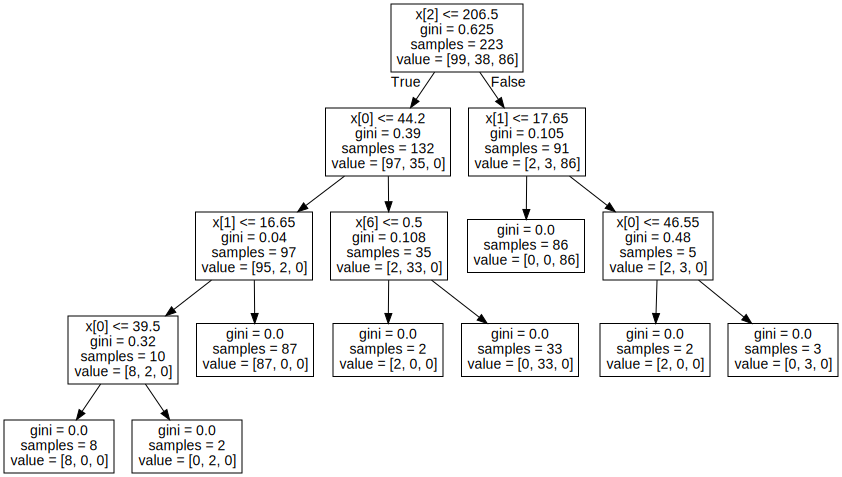

In [22]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:**

- Houveram 5 predições incorretas
- Um indivíduo da espécie Gentoo foi considerado como Adelie
- Quatro indivíduos da espécie Chinstrap foram considerados como Adelie

In [23]:
# resposta da questão 3.2.a

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [24]:
target_predicted = model.predict(predictors_test)

In [25]:
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[47  0  0]
 [ 4 26  0]
 [ 1  0 32]]


In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

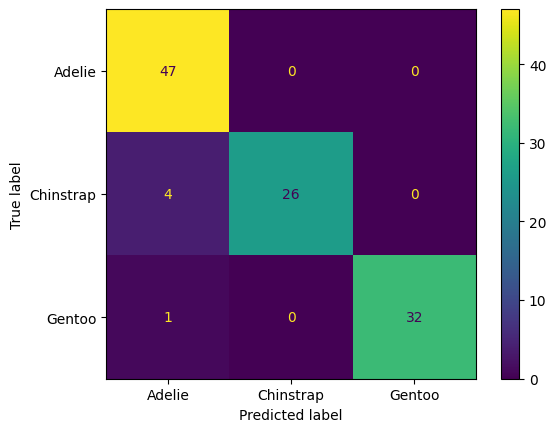

In [27]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)

display.plot()
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

In [28]:
# resposta da questão 3.2.b

from sklearn.metrics import accuracy_score

In [29]:
acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.9545454545454546


In [30]:
print(f"A acurácia para o modelo de árvore de decisão sobre penguins treinado com os dados de teste (1/3) é:\n{round(100 * acuracia, 2)}%")

A acurácia para o modelo de árvore de decisão sobre penguins treinado com os dados de teste (1/3) é:
95.45%


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

In [31]:
# resposta da questão 4.1

penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_torgersen_nom,island_biscoe_nom,island_dream_nom,sex_male_nom,sex_female_nom
0,Adelie,39.1,18.7,181.0,3750.0,1,0,0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,1,0,0,1,0


In [32]:
penguim = np.array([38.2, 18.1, 185.0, 3950.0, 0, 1, 0, 1, 0])

In [33]:
especie = model.predict(penguim.reshape(1, -1))
print(especie)

['Adelie']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


| species | island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

---